# What is clustering?


Clustering is an unsupervised machine learning method used to clasify data. Let's break down what this means!

- *Unsupervised:* This refers to the degree that you help the algorithm with pre-given labels. In an unsupervised method, the AI tries to find patterns of its own without support from a human.
  For example, if you would have an AI classify images of cats and dogs, a supervised method would mean you tell the AI it needs to find "cats" and "dogs". In an unsupervised methods, you simply feed it the data and see what it does.
- *Classifying:* Separating objects into different categories based on their characteristics. 

Clustering finds interesting patterns in the data and partitions it into groups based on the similarity within groups and disimilarity between groups. For example, a husky and a labrador are more likely to belong to the same group than a husky and a siamese.

There are many applications for clustering, main ones being data summarization and understanding. If you have a database of many documents, you can use clustering to put them into categories based on their topic. That means you will have perhaps documents that are sports-related, fiction, or academic papers, as example of categories. Clustering is also very useful to understand business data. You can cluster your clients for instance to decide which subscription to promote to them based on their preferences.


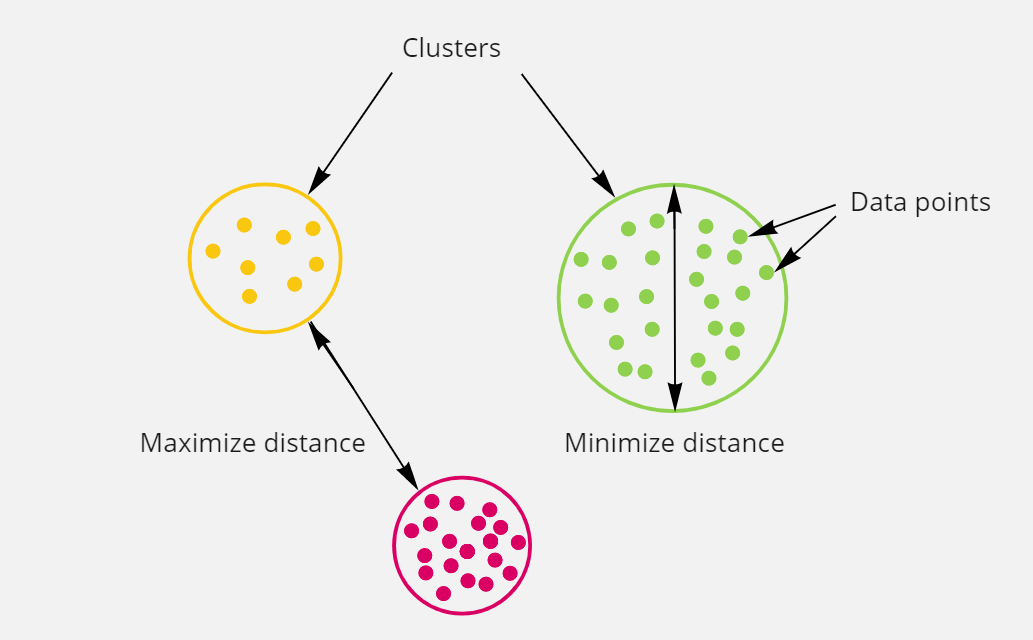





# K-Means Clustering

A clustering is a set of clusters. In this exercise, we will focus on partitional clustering, which is a method of dividing data points into sets such that a data point belongs only to one specific set. 

The algorithm we will use is called *K-means clustering*. The main idea behind this algorithm is that a close-knit group is more likely to have the same characteristics. Just like in a group of friends, people might like the same things! The K in this algorithm stands for the number of groups you expect to get. You ideally want to get groups that are as different from other groups as possible, while the individuals inside that group are as similar as possible. \\

One important thing to keep in mind is that you don't know what the groups' names are! You only know that you maybe expect a certain number of groups. Making the clusters helps you separate a group from the crowd to study its individual properties. It's usually the case that you start with a low k and add from there. 

Here is the pseudocode (the logic of the algorithm) for K-means. A centroid is the center of a cluster. Choosing initial centroids just means you expect to end up with that number of clusters. The only other thing you care about is the distance between each data point and that centroid. A data point belongs to the cluster with the closest centroid: <p>

&nbsp;

---

*Select* k initial centroids. <p>
*Repeat* <p>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;      Create K clusters by assigning each data point to the closest centroid <p>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;       Realocate the centroid for each cluster to the true centroid <p>
*until* centroids don't change

---
&nbsp;

Let's try it ourselves!

# K-Means in Python

In [ ]:
# Imports, you can just execute this cell!
import numpy as np
import scipy.io as sc
from scipy import stats 
import pandas as pd
import sklearn as skl
import sklearn.metrics as skm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
%matplotlib inline

We will be using the Iris dataset. This is somewhat the "abc" dataset for programming beginners. It contains 150 data points consisting of iris flowers, based on Petal Length, Petal Width, Sepal Length, Sepal Width. These characteristics divide them into 3 types: Virginica, Setosa, Versicolor, with 50 samples of each. Since clustering is an unsupervised method, we will be trying to determine the species based on the characteristics. First, let's inspect the data.

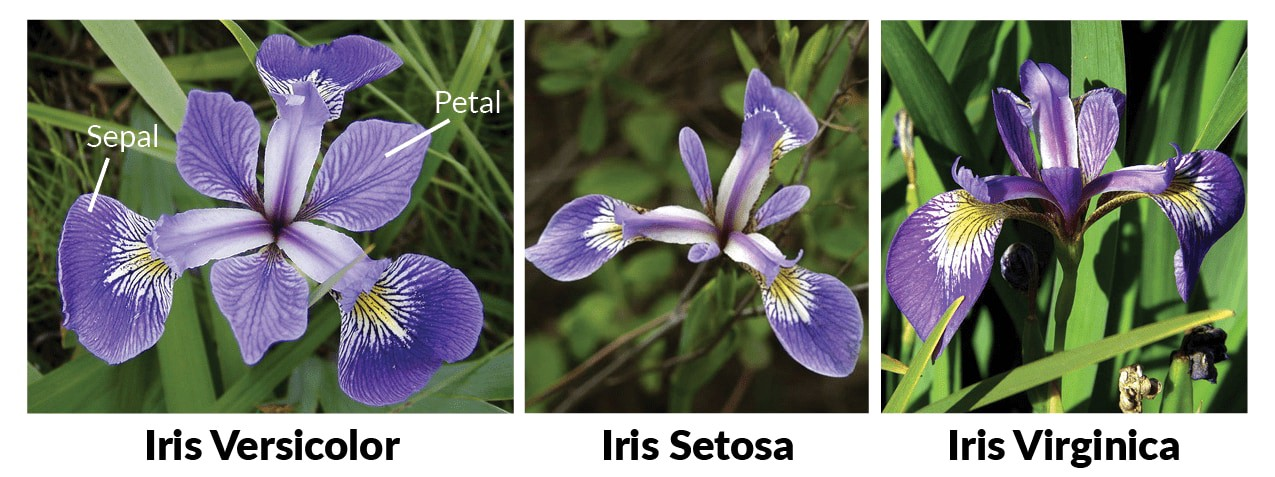

source image:https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png

Remember that you always have to first clean data before you can use it! The Iris dataset is already cleaned for us.

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)

In [ ]:
# Print the first 5 values in the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Print 10 random data points
df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
45,4.8,3.0,1.4,0.3
32,5.2,4.1,1.5,0.1
107,7.3,2.9,6.3,1.8
88,5.6,3.0,4.1,1.3
105,7.6,3.0,6.6,2.1
49,5.0,3.3,1.4,0.2
1,4.9,3.0,1.4,0.2
130,7.4,2.8,6.1,1.9
37,4.9,3.6,1.4,0.1
21,5.1,3.7,1.5,0.4


In [ ]:
# Pull out the characteristics of each column attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
# Extract the individual iris data points
x = df.loc[0:].values

Notice how we don't have a label! That is because we are performing unsupervised learning.

In [ ]:
# Rename the column headers for efficiency
df = df.rename(columns={'sepal length (cm)': 'sepal_length', 'sepal width (cm)': 'sepal_width', 'petal length (cm)': 'petal_length', 'petal width (cm)': 'petal_width'})

Now that we know a little about the attributes, it is time to plot the data! Can you already identify any tendencies?

Text(0.5, 1.0, 'Sepals Iris Flower ')

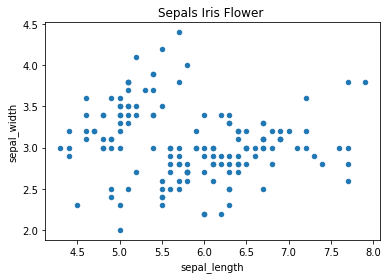

In [ ]:
# Use a scatter plot based on sepals
df.plot(kind="scatter", x="sepal_length", y="sepal_width")
plt.title("Sepals Iris Flower ")
plt.show()

Text(0.5, 1.0, 'Pepals Iris Flower ')

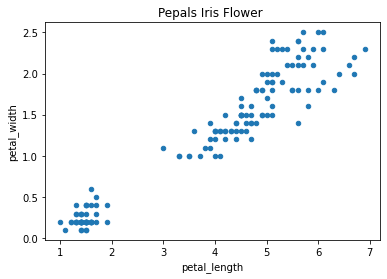

In [ ]:
# Use a scatter plot based on petals
df.plot(kind="scatter", x="petal_length", y="petal_width")
plt.title("Pepals Iris Flower ")
plt.show()

We already know the data set contains samples from 3 iris species. However, we can check when performing k-means how many clusters we need to best decribe the data. To do so, we can test out the algorithm while using different k.

In [ ]:
# Initialize the k variable to 5
k = 5

In [ ]:
# Run a K-means algorithm using the pre-defined k
kmeans = KMeans(n_clusters = k)
kmeans.fit(x)

KMeans(n_clusters=5)

In [ ]:
# We will predict the labels from the dataset
labels = kmeans.fit_predict(df)

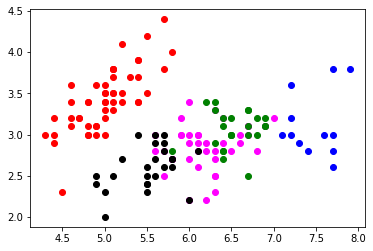

In [ ]:
# Plot the clusters you found
plt.scatter(x[labels == 0, 0], x[labels == 0, 1], c = 'magenta')
plt.scatter(x[labels == 1, 0], x[labels == 1, 1], c = 'red')
plt.scatter(x[labels == 2, 0], x[labels == 2, 1], c = 'blue')
plt.scatter(x[labels == 3, 0], x[labels == 3, 1], c = 'green')
plt.scatter(x[labels == 4, 0], x[labels == 4, 1], c = 'black')

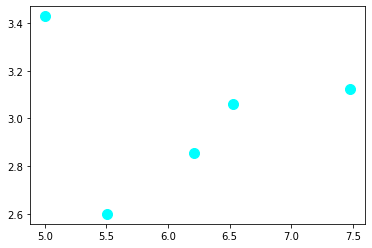

In [ ]:
# Add the centroids to the plot
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'cyan', label = 'Centroids')

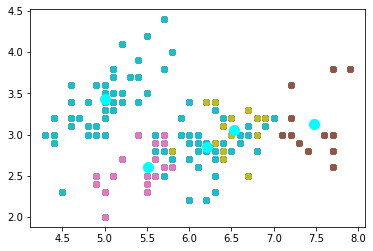

In [ ]:
# Clean up our code with a for loop
for item in labels:
    plt.scatter(x[labels == item, 0] , x[labels == item , 1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'cyan', label = 'Centroids')
plt.show()

#  Evaluation

We can intuitively tell this is not quite right. We ideally want our clusters to be well-separated. Perhaps the k we chose was not the best.

We can try to select multiple k and perform k-means for each of them. Instead of plotting the results, we will use a performance metric to evaluate the model.

The elbow method ranges the value of centroids and computes the Within-Cluster Sum of Squares (WCSS) for each case. WCSS represents the sum of squared distance between each point and the centroid in a cluster. WCCS will decrease the more the number of centroids increases. At a certain point, it will stagnate, therefore the elbow shape.

Using this metric we can choose the ideal number of clusters, minimizing time and maximizing performance.


In [ ]:
# Create an array to store the WCCS
wcss = [] 

In [ ]:
# Perform k means for k=1-10 and store the wccs for each iteration
for i in range(1, 11): 
    kmeans_improved = KMeans(n_clusters = i)
    kmeans_improved.fit(x) 
    wcss.append(kmeans_improved.inertia_)

KMeans(n_clusters=1)

KMeans(n_clusters=2)

KMeans(n_clusters=3)

KMeans(n_clusters=4)

KMeans(n_clusters=5)

KMeans(n_clusters=6)

KMeans(n_clusters=7)

KMeans()

KMeans(n_clusters=9)

KMeans(n_clusters=10)

Text(0.5, 1.0, 'The elbow method')

Text(0.5, 0, 'Nr. of clusters')

Text(0, 0.5, 'WCSS')

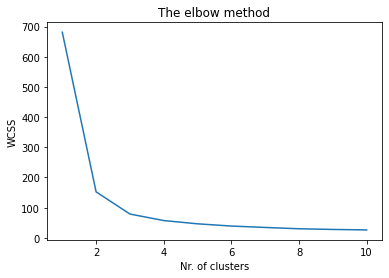

In [ ]:
# Visualize the Elbow method
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Nr. of clusters')
plt.ylabel('WCSS')
plt.show()

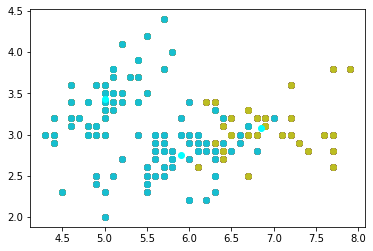

In [ ]:
# We can observe the ideal number of clusters. Plot this clustering
kmeans_ideal = KMeans(n_clusters = 3)
labels_ideal = kmeans_ideal.fit_predict(x)
for item in labels_ideal:
    plt.scatter(x[labels_ideal == item, 0] , x[labels_ideal == item , 1])
plt.scatter(kmeans_ideal.cluster_centers_[:, 0], kmeans_ideal.cluster_centers_[:,1], c = 'cyan', label = 'Centroids')
plt.show()

There are many metrics to evaluate a model. Let's focus on the Silhoute score!

The Silhoute coefficient takes into account cluster cohesion (distance within clusters) and cluster separation (distance between clusters). Th coefficient can vary between -1 and 1, with:
 - -1 meaning that the data point was asssigned to the wrong cluster
 - 0 meaning that the data point is near the edge of the cluster
 - 1 meaning that the data point belongs and fits well to the cluster.

 The Silhouette score can be computed as such:

 $S_i = \frac{b_i - a_i}{Max(b_i, a_i}$, where

 - $a_i$ is the mean distance from a data point i to all the other points in the same cluster
 - $b_i$ is the mean distance of a point i to the points in the nearest cluster.


In [ ]:
# Compute the Silhouette score for the ideal K-means
from sklearn.metrics import silhouette_score

score = silhouette_score(x, kmeans_ideal.labels_)
print(score)

0.5528190123564095


# Do it Yourself!

Congratulations! Now you know what clustering is and how to apply it using the k-means algorithm. You can try it out on a new data set using the methods you've learned!

In [ ]:
wine = datasets.load_wine()
wine_df = pd.DataFrame(data = wine.data, columns = wine.feature_names)